# Reading in Some Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("drawndata1.csv")

In [3]:
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


In [4]:
X = df[['x', 'y']].values
y = df['z'] == "a"

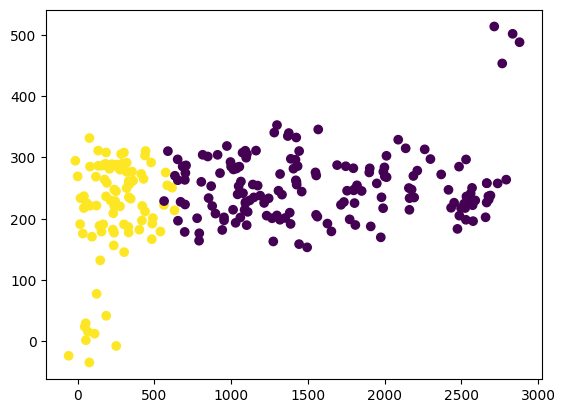

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y); # x and y have very different ranges and we observe outliers. we want them to have similar ranges 
# and we want to reduce the outlier 

Just applying a scaler here.

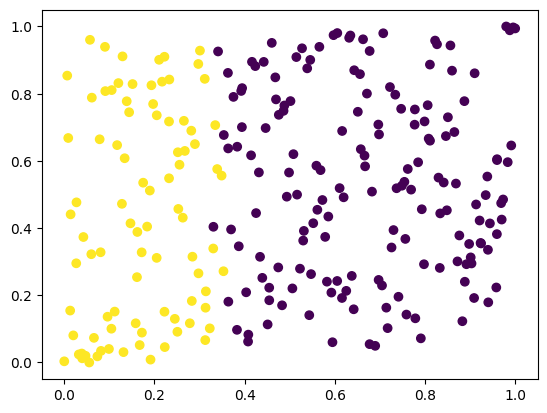

In [23]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer # different scalling objects   
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline # pipeline object

X_new = QuantileTransformer(n_quantiles=100).fit_transform(X) # "fit_transform" : uses the scalling object to fit the data (e.g scalling 
# based on n number of quantiles or scalling by (x-mean)/std or.... ) then transforms the using the desired scalling into new values) 

# the two lines below are equivlent to the line above. note that  bb_transform = bbtransform2  
bb=  QuantileTransformer(n_quantiles=100)
bb_fit= bb.fit(X) ; bb_transform = bb_fit.transform (X) ; bb_transform2= bb.transform(X);  


plt.scatter(X_new[:, 0], X_new[:, 1], c=y);

Function to deal with the plotting.

In [ ]:
def plot_output(scaler):
    pipe = Pipeline([
        ("scale", scaler),
        ("model", KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title("Original Data")
    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title("Transformed Data")
    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)), 
        np.random.uniform(0, X[:, 1].max(), (5000, 1))
    ], axis=1)
    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

Effect of StandardScaler

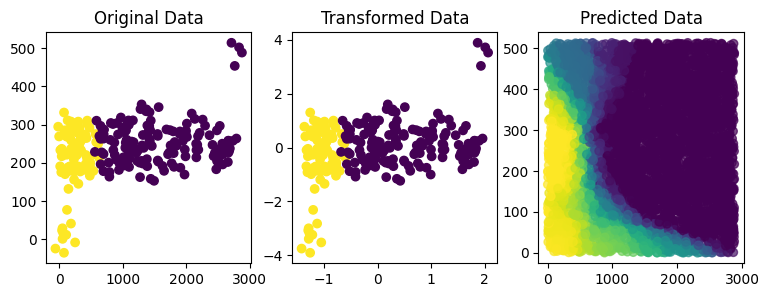

In [9]:
plot_output(scaler=StandardScaler())

Effect of QuantileTransformer

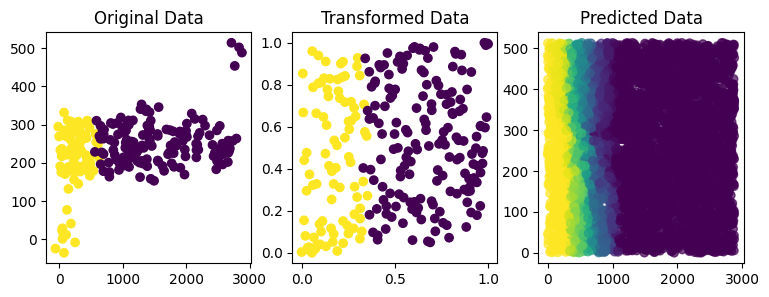

In [10]:
plot_output(scaler=QuantileTransformer(n_quantiles=100))

# New Dataset

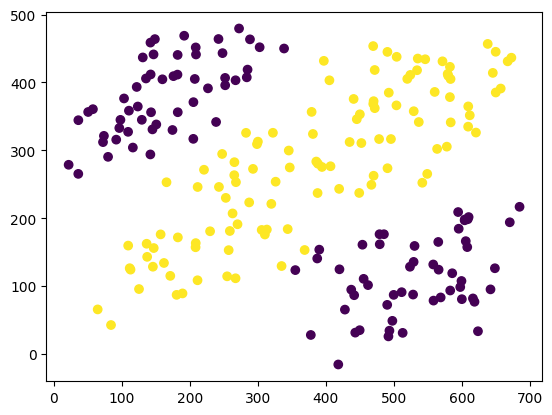

In [24]:
df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == 'a'
plt.scatter(X[:, 0], X[:, 1], c=y);

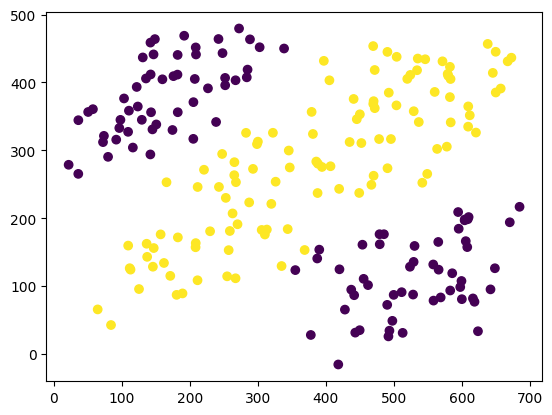

In [25]:
from sklearn.linear_model import LogisticRegression # model 
from sklearn.preprocessing import PolynomialFeatures # a preprocessing object that considers polynomial features not just liner features
# e.g x1*x2 , x1^2 , x2^2.....
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

# One Hot Encoding

In [60]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [ ]:
from sklearn.preprocessing import OneHotEncoder # a preprocessing object that turns categrical labels into numerical ones

In [ ]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore') # the "handle_unknown='ignore'" helps dealing with new categories 
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [74]:
enc.transform([["zero"]])

array([[0., 0., 0.]])